# Análisis Exploratorio de Datos
Vamos a realizar los siguientes analisis:

 - Estadísticas descriptivas y distribución de puntajes.

 - Distribución porcentual de variables categóricas.

Estadísticas descriptivas y distribución de puntajes


Obejtivo:


Analizar la tendencia central y la dispersion de los puntajes. Visualizacion mediante histogramas para detectar la posible presencia de algunos en los datos.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('../data/interim/2022_Censo_Estudiantes.csv',sep=',', decimal=".")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403468 entries, 0 to 403467
Columns: 232 entries, c_jurisdiccion to jurisdiccion
dtypes: float64(9), int64(4), object(219)
memory usage: 714.1+ MB


In [10]:
df.head(5)

,c_jurisdiccion,ID1,idseccion,idalumno,sector,ambito,ap01,ap02,ap03,ap04,...,NSE_puntaje,NSE_nivel,edadA_junio2022,migracion,sobreedad,Nivel_Ed_Madre,Nivel_Ed_Padre,Nivel_Ed_Persona_Resp,region,jurisdiccion
0,90,36008003600800,1,655437,Estatal,Urbano,Diciembre,2002.0,Femenino,Argentina,...,-0.372449,NaN,19 años,NaN,2 años de sobreedad (19 años al 30 de junio),NaN,NaN,,NOA,Tucumán
1,90,36008003600800,1,655438,Estatal,Urbano,Enero,2005.0,Femenino,Argentina,...,-0.716539,NaN,17 años,Configuración familiar no migrante,Edad teórica para el año (17 años al 30 de junio),NaN,NaN,,NOA,Tucumán
2,90,36008003600800,1,655439,Estatal,Urbano,Enero,2005.0,Femenino,Argentina,...,NaN,NaN,17 años,Configuración familiar no migrante,Edad teórica para el año (17 años al 30 de junio),NaN,NaN,,NOA,Tucumán
3,90,36008003600800,1,655440,Estatal,Urbano,Noviembre,2002.0,Masculino,Argentina,...,0.122361,NaN,19 años,NaN,2 años de sobreedad (19 años al 30 de junio),NaN,NaN,,NOA,Tucumán
4,90,36008003600800,1,655441,Estatal,Urbano,Junio,2003.0,Masculino,Argentina,...,-0.654602,NaN,19 años,NaN,2 años de sobreedad (19 años al 30 de junio),NaN,NaN,,NOA,Tucumán


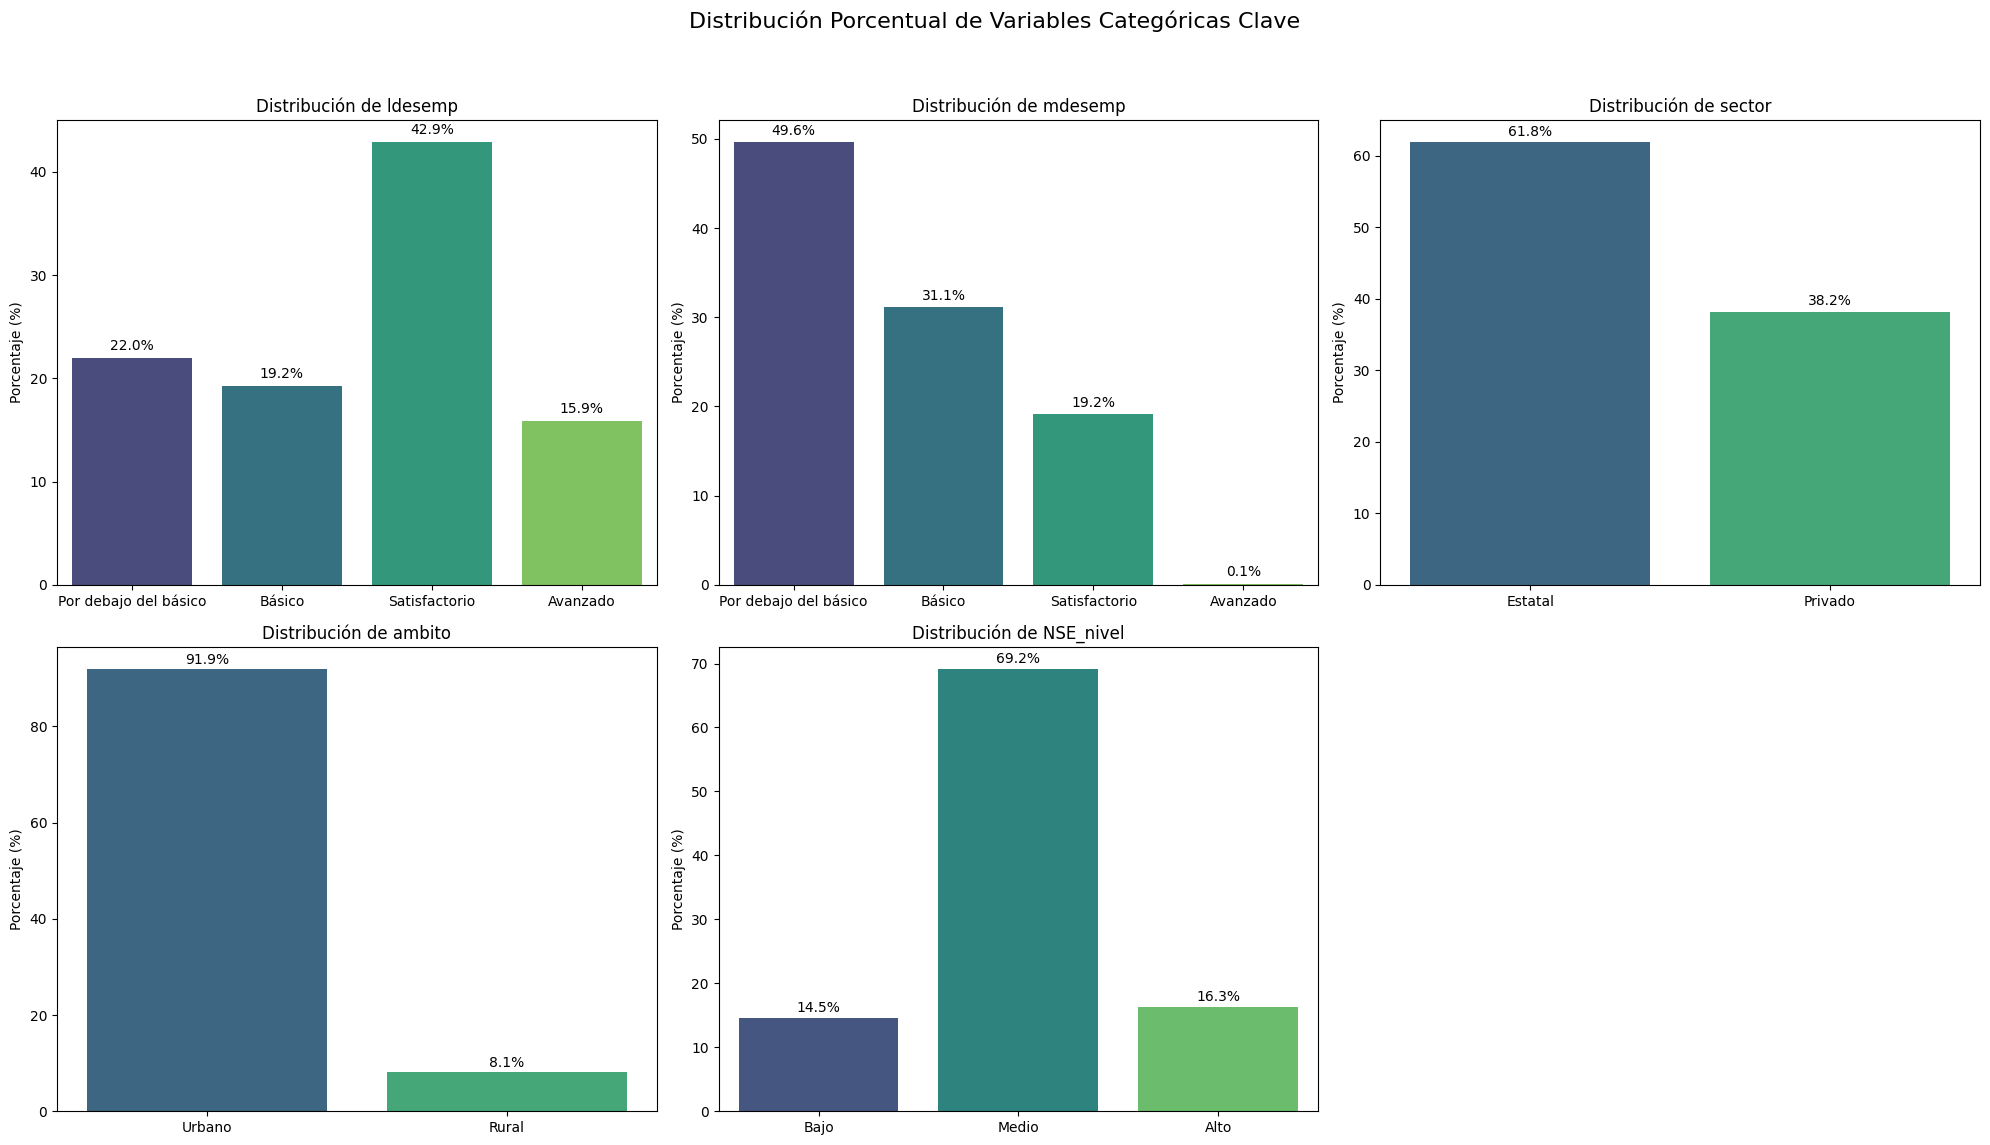

In [6]:
vars_categoricas_eda = ['ldesemp', 'mdesemp', 'sector', 'ambito', 'NSE_nivel']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten() 
fig.suptitle('Distribución Porcentual de Variables Categóricas Clave', fontsize=16)

for i, col in enumerate(vars_categoricas_eda):
    
    temp_data = df[col].astype(str).dropna()
    
    plot_data = temp_data[temp_data != 'nan'].value_counts(normalize=True).mul(100)

    if col in ['ldesemp', 'mdesemp']:
        orden_desemp = ['Por debajo del básico', 'Básico', 'Satisfactorio', 'Avanzado']
        plot_data = plot_data.reindex(orden_desemp)
    elif col == 'NSE_nivel':
        orden_nse = ['Bajo', 'Medio', 'Alto']
        plot_data = plot_data.reindex(orden_nse)

    sns.barplot(x=plot_data.index, y=plot_data.values, ax=axes[i], palette="viridis", hue=plot_data.index, legend=False)
    
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_ylabel('Porcentaje (%)')
    axes[i].set_xlabel(None)
    
    for bar in axes[i].patches:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2., 
                    height + 0.5, 
                    f'{height:.1f}%', 
                    ha='center', 
                    va='bottom')

fig.delaxes(axes[5])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Algunas observaciones a cerca de los graficos:


Podemos notar una clara diferencia en cuanto al desempeño entre lengua y matematica. En donde casi el 50% de los estudiante tiene un nivel 'por debajo del basico'. Y el 42.9% tiene un desempeño 'satisfacorio' en lengua. Posteriormente vamos a analizar si estas diferencia se ven influenciados por el sector y por el ambito. En cuanto al NSE (nivel socioeconomico) mas del 50% de los estudiantes pertenece a un nivel socioeconomico 'Medio'. Tambien se observa que un gran porcentaje de los estudiantes se encuentran establecidos en el ambito 'Urbano' (91.9%). 

Estadísticas descriptivas de puntajes (ignorando NaN)
            lpuntaje       mpuntaje    NSE_puntaje
count  391291.000000  386779.000000  349871.000000
mean      515.163826     474.615813       0.282872
std       115.211869      68.370188       0.674014
min       160.253110     292.031340      -2.116088
25%       429.515135     423.734800      -0.101794
50%       512.628540     466.085660       0.395518
75%       599.367920     519.790495       0.781679
max       822.416380     691.073300       2.677012


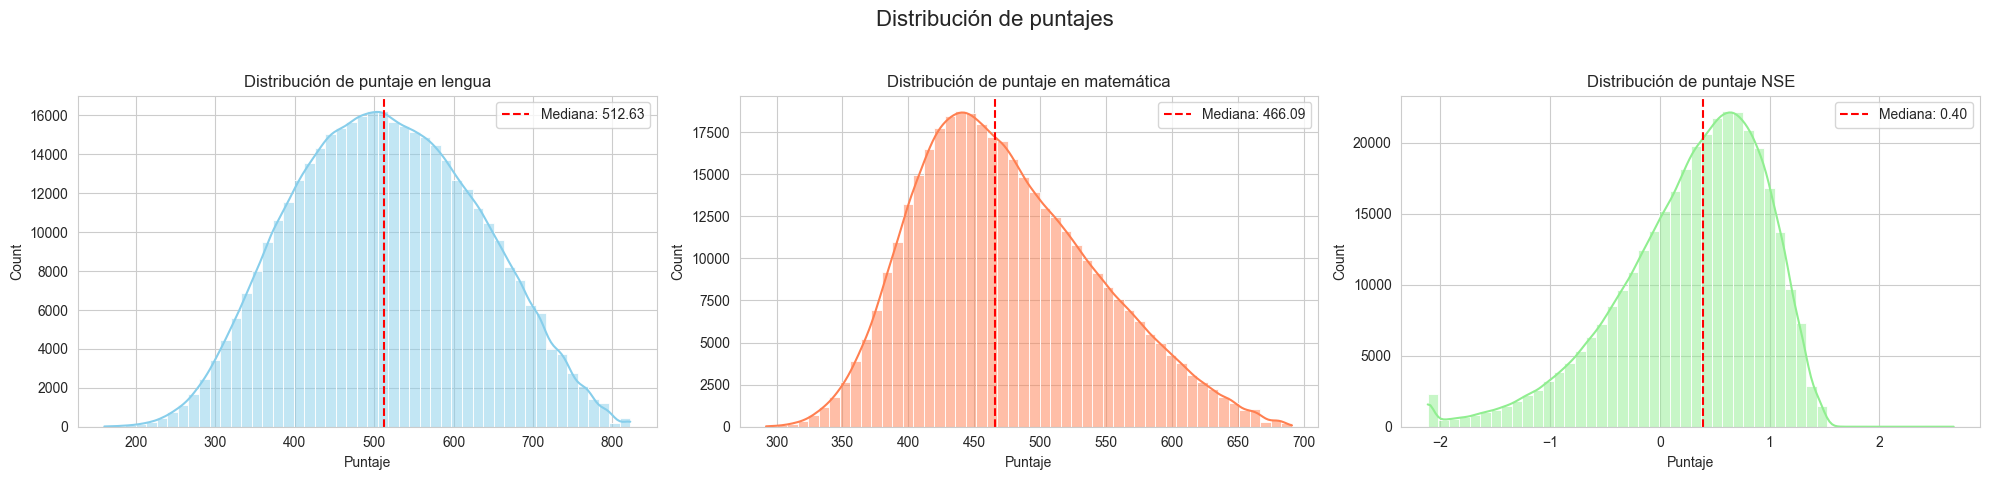

In [7]:
# Configuración de los gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 6)

# Estadísticas descriptivas 
print("Estadísticas descriptivas de puntajes (ignorando NaN)")
print(df[['lpuntaje', 'mpuntaje', 'NSE_puntaje']].describe())

# Visualización de distribuciones
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Distribución de puntajes', fontsize=16)

# Histograma de puntaje de lengua
sns.histplot(df['lpuntaje'].dropna(), kde=True, ax=axes[0], color='skyblue', bins=50)
axes[0].set_title('Distribución de puntaje en lengua')
axes[0].set_xlabel('Puntaje')
axes[0].axvline(df['lpuntaje'].median(), color='red', linestyle='--', label=f'Mediana: {df["lpuntaje"].median():.2f}')
axes[0].legend()

# Histograma de puntaje de matemática
sns.histplot(df['mpuntaje'].dropna(), kde=True, ax=axes[1], color='coral', bins=50)
axes[1].set_title('Distribución de puntaje en matemática')
axes[1].set_xlabel('Puntaje')
axes[1].axvline(df['mpuntaje'].median(), color='red', linestyle='--', label=f'Mediana: {df["mpuntaje"].median():.2f}')
axes[1].legend()

# Histograma de puntaje NSE
sns.histplot(df['NSE_puntaje'].dropna(), kde=True, ax=axes[2], color='lightgreen', bins=50)
axes[2].set_title('Distribución de puntaje NSE')
axes[2].set_xlabel('Puntaje')
axes[2].axvline(df['NSE_puntaje'].median(), color='red', linestyle='--', label=f'Mediana: {df["NSE_puntaje"].median():.2f}')
axes[2].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Observaciones de los puntajes:

Estadisticas descriptivas de Lengua: la media y la mediana son muy similares, con lo cual se asemeja mucho a una distribucion asimetrica (casi normal). Tiene un desvio estandar de 115, lo que indica que existen mucha variabilidad entre los datos, con estudiantes muy por debajo y muy por encima del promedio.

Estadisticas descriptivas de Matematica: a primera vista podemos ver que la media es menor que la de lengua. Lo que nos dice que hay una mayor dificultad en Matematica. Con un leve sesgo hacia la derecha pero con un desvio estandar de 68 (menor que la de lengua) los puntajes estan mas concentrados cerca del promedio.

Estadisticas descriptivas de NSE: distribucion ligeramente sesgada hacia la derecha. Promedio y mediana positivos indican que la muestra tiene un ligero prodominio de NSE medio-alto.

# Analisis bivariado categórico vs. numerico


El objetivo de esta fase es visualizar como las variables categóricas de contexto, como 'ambito', 'sector' y 'NSE', se relacionan con las medias de puntajes (lpuntaje, mpuntaje). Usaremos gráficos de caja, para que de esta forma poder observar la media, mediana, la dispersión y los valores atípicos para cada grupo.

# Rendimiento por Contexto


Objetivo:

Detectar visualmente las diferencia en cuanto al rendimiento. Por ejemplo, si el puntaje promedio del sector privado es significativamente mas alto que el del sector estatal, o si existe una notable diferencia entre los niveles NSE.

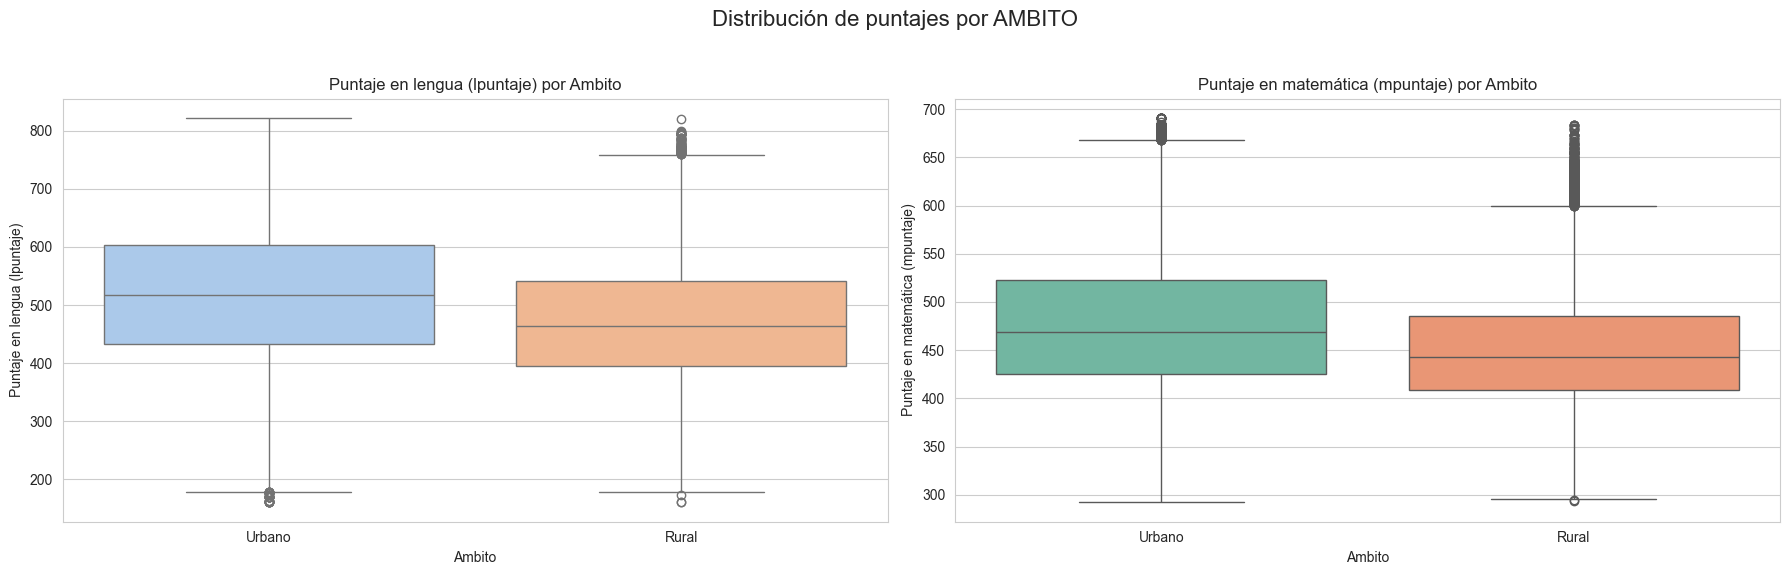

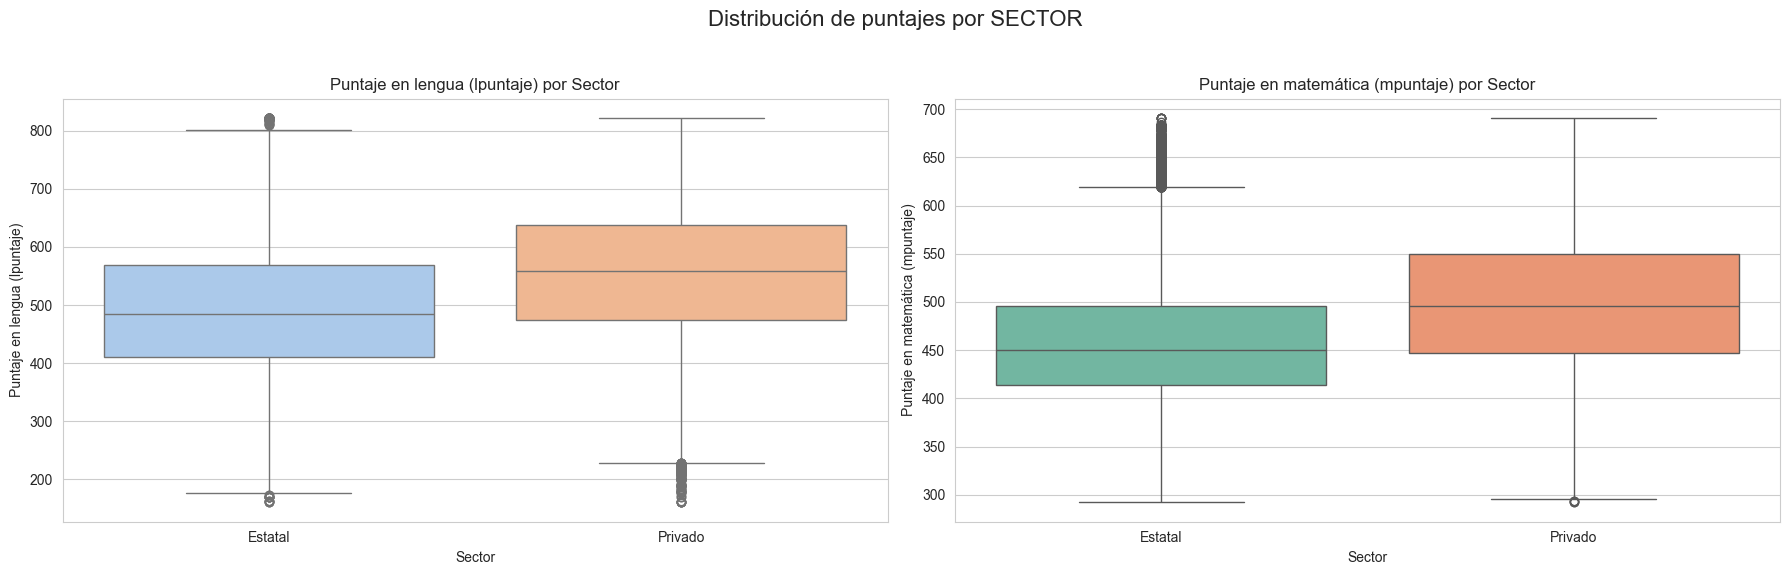

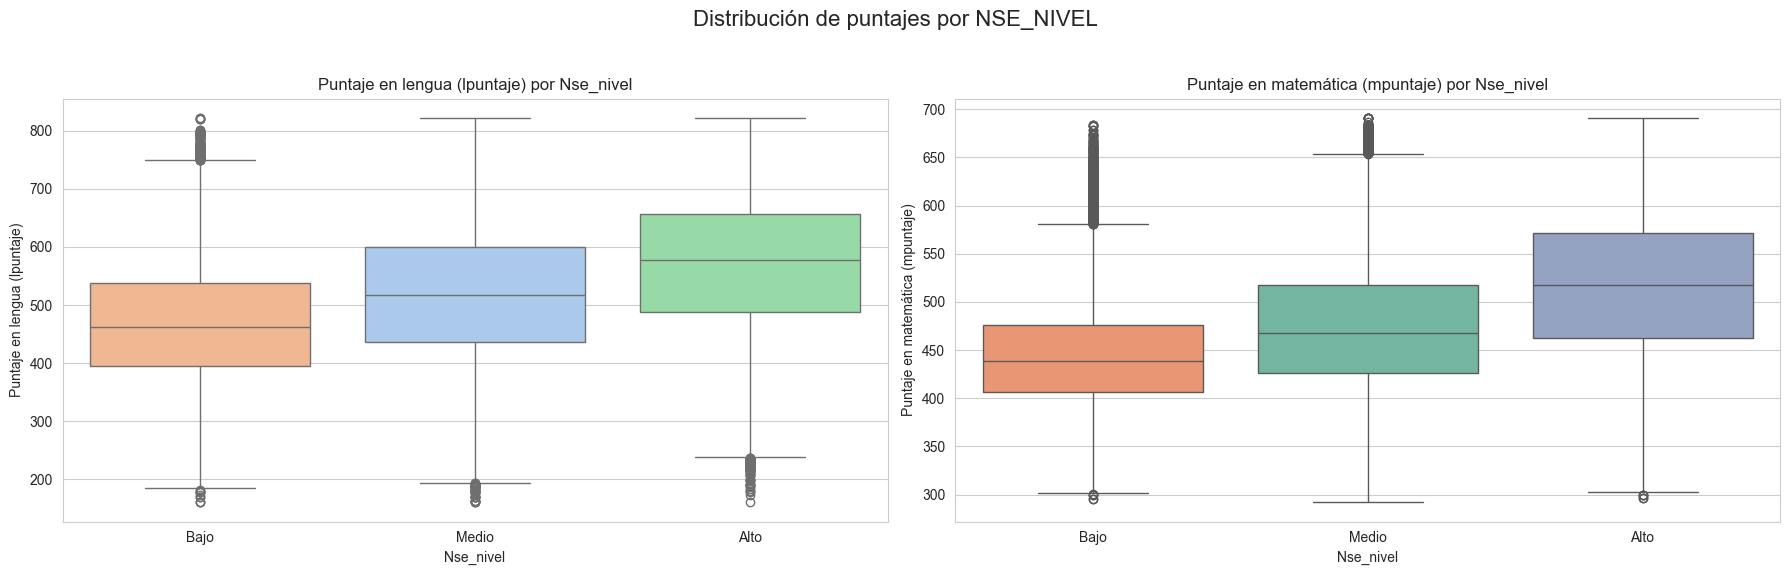

In [8]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)

variables_contexto = ['ambito', 'sector', 'NSE_nivel']
puntajes = ['lpuntaje', 'mpuntaje']

for contexto in variables_contexto:
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    fig.suptitle(f'Distribución de puntajes por {contexto.upper()}', fontsize=16)

    orden_contexto = None
    if contexto == 'NSE_nivel':
        orden_contexto = ['Bajo', 'Medio', 'Alto']
    
    sns.boxplot(x=contexto, y='lpuntaje', data=df, order=orden_contexto, ax=axes[0], palette="pastel", hue=contexto, legend=False)
    axes[0].set_title(f'Puntaje en lengua (lpuntaje) por {contexto.capitalize()}')
    axes[0].set_ylabel('Puntaje en lengua (lpuntaje)')
    axes[0].set_xlabel(contexto.capitalize())

    sns.boxplot(x=contexto, y='mpuntaje', data=df, order=orden_contexto, ax=axes[1], palette="Set2", hue=contexto, legend=False)
    axes[1].set_title(f'Puntaje en matemática (mpuntaje) por {contexto.capitalize()}')
    axes[1].set_ylabel('Puntaje en matemática (mpuntaje)')
    axes[1].set_xlabel(contexto.capitalize())

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Observaciones: 

Distribucion de puntajes por AMBITO: en el grafico observamos que los estudiantes del ambito 'urbano' tienden a obtener un mayor puntajes tanto el lengua como en matematica. La dispersion de puntajes es bastante similar en ambos ambitos, aunque el ambito 'urbano' es un poco mas amplia. Existen datos outliers que reflejan algunas casos de desempeño muy altos y muy bajos en ambos ambitos.

Distribucion de puntajes por Sector: En cuanto a la mediana, podemos observar que es mal alta la del sector 'privado' que la del 'publico'. Por lo tanto los estudiantes de escuelas privadas rinden mucho mejor en Lengua que los de escuelas estatales. Lo mismo ocurre en matematica, en donde la mediana es mas alta en el sector privado. Las escuelas estatales presentan mayor variabilidad y una proporcion mayor de puntajes bajos.

Distribucion de puntajes por NSE: mmbos gráficos muestran una fuerte correlación positiva entre el nivel socioeconomico y los puntajes obtenidos en las asignaturas. El grupo de NSE alto tiene las medianas mas altas de manera consistente, indicando que la mitad de sus estudiantes obtuvieron puntajes superiores a la mitad de los estudiantes de los niveles medio y bajo. Las grandes diferencias entre las medianas de los tres niveles, especialmente entre bajo y alto, en ambas asignaturas, sugieren una brecha de rendimiento asociada al nivel socio-económico.


# Rendimiento por Jurisdicción


Objetivo:


Analizar la variabilidad en los puntajes promedios entre las 24 jurisdicciones.

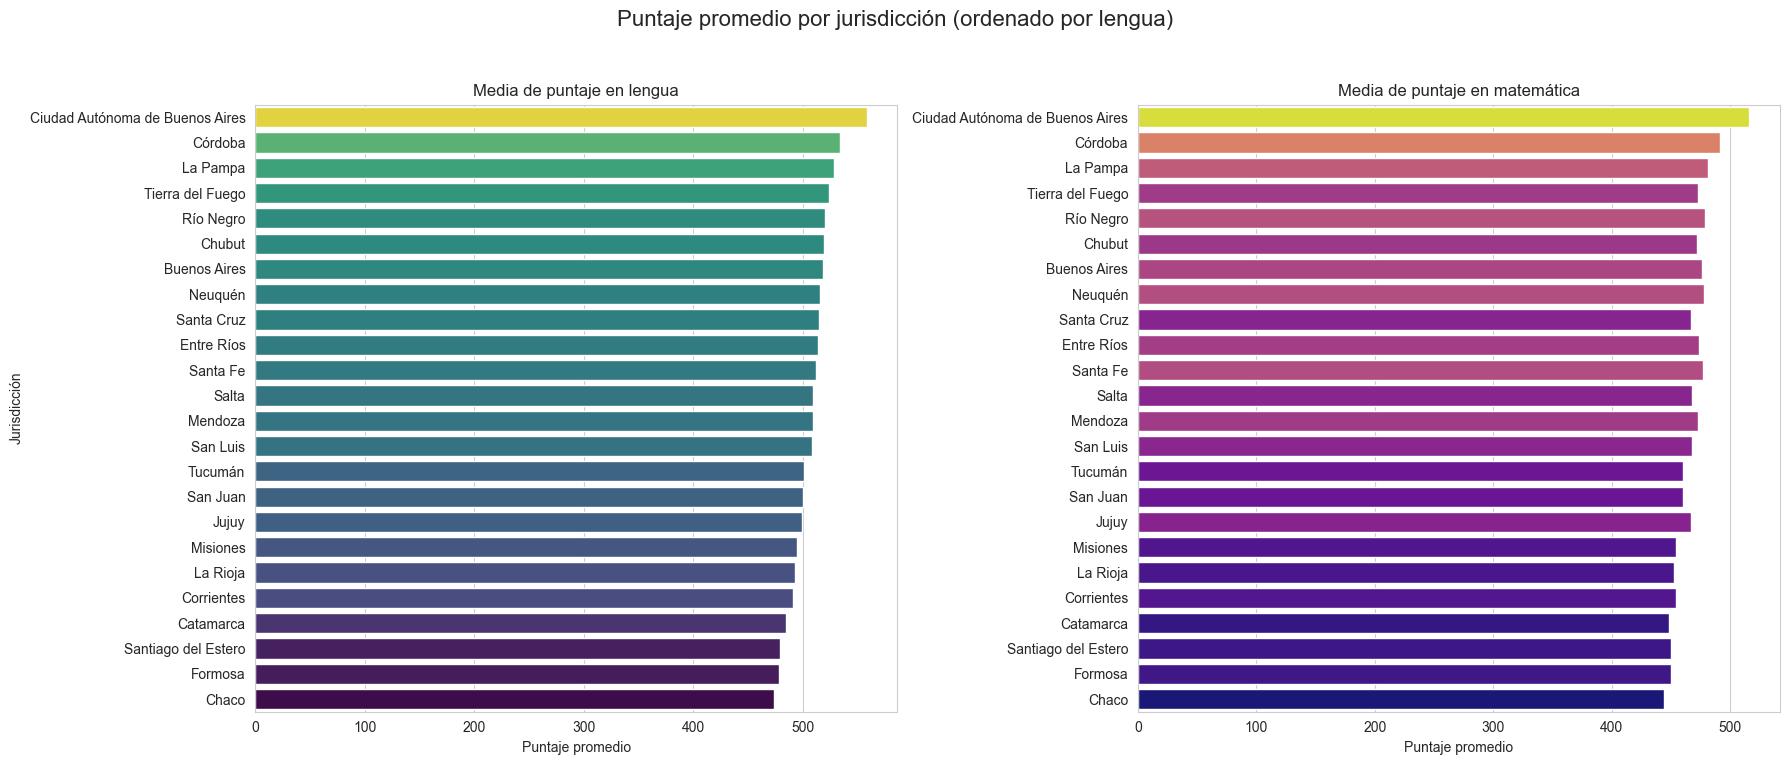

In [9]:
if 'jurisdiccion' not in df.columns:
    print("La columna 'jurisdiccion' no se encuentra.")
else:
    # Calculamos la media de puntaje por jurisdiccion
    df_media_jurisdiccion = df.groupby('jurisdiccion')[['lpuntaje', 'mpuntaje']].mean().reset_index()

    # Ordenamos las jurisdicciones por el puntaje promedio de lengua
    df_media_jurisdiccion = df_media_jurisdiccion.sort_values(by='lpuntaje', ascending=False)

    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    fig.suptitle('Puntaje promedio por jurisdicción (ordenado por lengua)', fontsize=16)

    # Grafico de lengua
    sns.barplot(x='lpuntaje', y='jurisdiccion', data=df_media_jurisdiccion, ax=axes[0], palette="viridis", hue='lpuntaje', legend=False)
    axes[0].set_title('Media de puntaje en lengua')
    axes[0].set_xlabel('Puntaje promedio')
    axes[0].set_ylabel('Jurisdicción')

    # Grafico de matemática (mpuntaje)
    sns.barplot(x='mpuntaje', y='jurisdiccion', data=df_media_jurisdiccion, ax=axes[1], palette="plasma", hue='mpuntaje', legend=False)
    axes[1].set_title('Media de puntaje en matemática')
    axes[1].set_xlabel('Puntaje promedio')
    axes[1].set_ylabel('') 

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Este grafico nos dice que la Ciudad Autonoma de Buenos Aires tiene el puntaje promedio mal alto en Lengua (alrededor de 550), destacandose claramente de resto de las jurisdicciones. Le sigue Cordoba con alrededor de 520 y la pampa con aproximadamente 510.
La jurisdicciones con menor promedio el lengua son: Catamarca, Santiago del estero, Formosa y Chaco que es el mas bajo con 480.

Por otro lado el puntaje promedio de Matematica tambien se lleva el puntaje mas alto la Ciudad Autonoma de Buenos Aires. Aunque el promedio es mas bajo que el Lengua. Diferencia que ya habias notado anteriormente en la tabla descriptiva.

En base a estos resultados podemos decir que las jurisdicciones que rinden bien en Lengua generalmente tambien rinden bien en Matematica, sugiriendo que los factores que influyen en el puntaje estan fuertemente relacionados a la jurisdiccion.



--- Distribución Porcentual de Desempeño en Lengua por Nivel Socio Económico ---
ldesemp    Por debajo del básico  Básico  Satisfactorio  Avanzado
NSE_nivel                                                        
Bajo                       33.20   24.94          35.77      6.10
Medio                      19.95   19.33          45.11     15.61
Alto                       11.70   12.34          45.78     30.17


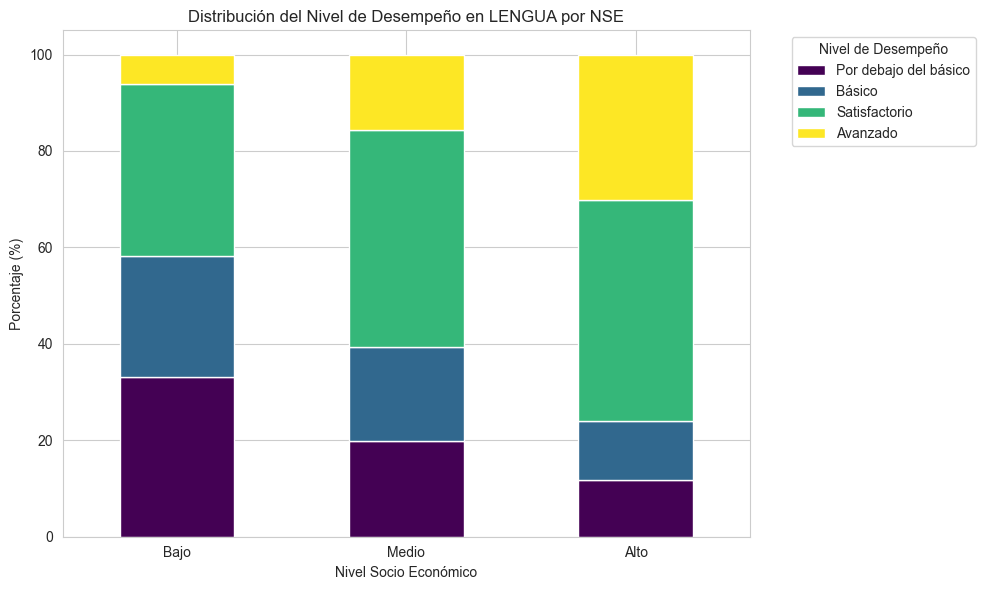

In [10]:
orden_desemp = ['Por debajo del básico', 'Básico', 'Satisfactorio', 'Avanzado']
orden_nse = ['Bajo', 'Medio', 'Alto']

# Tabla de Contingencia (Lengua vs. NSE)
# Calcular la distribución porcentual dentro de cada nivel sdocio económico 
tabla_lengua_nse = pd.crosstab(df['NSE_nivel'], df['ldesemp'], normalize='index') * 100

print("--- Distribución Porcentual de Desempeño en Lengua por Nivel Socio Económico ---")
print(tabla_lengua_nse.reindex(index=orden_nse, columns=orden_desemp).round(2))
plt.figure(figsize=(12, 6))
tabla_lengua_nse.reindex(index=orden_nse, columns=orden_desemp).plot(
    kind='bar', stacked=True, colormap='viridis', figsize=(10, 6), ax=plt.gca()
)
plt.title('Distribución del Nivel de Desempeño en LENGUA por NSE')
plt.xlabel('Nivel Socio Económico')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Nivel de Desempeño', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Observaciones: 


Podemos observar que a medida que el NSE aumenta, el porcentaje de estudiantes en los niveles de desempeño mas altos tambien aumenta significativamente. De manera similar podemos decir que a medida que el NSE disminuye, el porcentaje de estudiantes en los niveles de desempeño mas bajo tambien aumenta significativamente.

Estos resultados demuestran la brecha educativa y como el contexto socioeconomico es un factor determinante en el rendimiento de los estudiantes en la asignatura de Lengua.


Distribución porcentual de desempeño en lengua por sector de gestión
ldesemp  Por debajo del básico  Básico  Satisfactorio  Avanzado
sector                                                         
Estatal                  27.55   22.25          39.83     10.37
Privado                  13.18   14.48          47.68     24.66


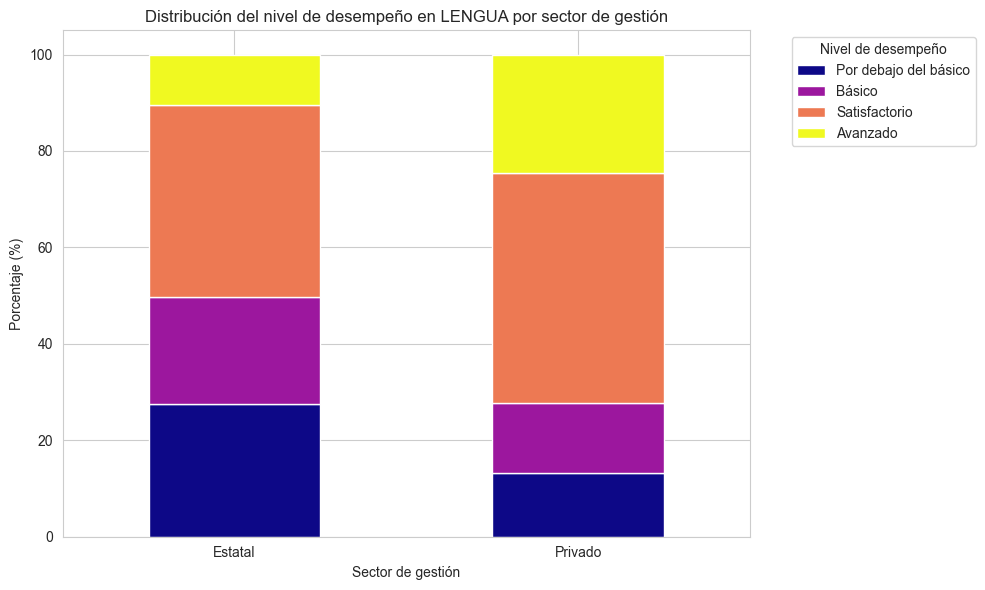

In [11]:
#  Tabla de Contingencia (Lengua vs. Sector)
tabla_lengua_sector = pd.crosstab(df['sector'], df['ldesemp'], normalize='index') * 100

print("\nDistribución porcentual de desempeño en lengua por sector de gestión")
print(tabla_lengua_sector.reindex(columns=orden_desemp).round(2))

plt.figure(figsize=(12, 6))
tabla_lengua_sector.reindex(columns=orden_desemp).plot(
    kind='bar', stacked=True, colormap='plasma', figsize=(10, 6), ax=plt.gca()
)
plt.title('Distribución del nivel de desempeño en LENGUA por sector de gestión')
plt.xlabel('Sector de gestión')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Nivel de desempeño', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Observaciones: 

Podemos observar que el sector de gestion privado tiene un mejor desempeño en Lengua con mas del 50% de los estudiantes teniendo un nivel de desempeño 'satisafactorio'. Esto pone en evidencia la relacion que existe entre el desempeño educativo y la gestion de las instituciones.

# ANALISIS DE VARIANZA ANOVA

Objetivo: 

Este analisis no vas a ser util para determinar si existe una diferencia significativa entre las medias de los grupos que estamos comparando. Y nos va a ayudar a confirmar, con base en datos, si el rendimiento promedio de los estudiantes es realmente diferente cuando se les agrupa por variables como la gestion (privado vs publica) o la Jurisdiccion.

In [11]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


El factor clave para la interpretacion es el valor de PR(>F), que representa el p-valor. 


Regla de decision: Si el p-valor es menor que el nivel de significancia $\alpha$ (generalmente 0.05), rechazamos la hipótesis nula (que establece que todas las medias son iguales) y concluimos que al menos una de las medias es diferente de las otras.

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 1. Eliminar filas con valores nulos en el puntaje y jurisdicción (ANOVA requiere datos completos)
df_anova = df[['lpuntaje', 'mpuntaje', 'jurisdiccion']].dropna()

# 2. ANOVA para Puntaje en Lengua (lpuntaje) vs. Jurisdicción
# Fórmula: 'Variable Dependiente ~ Variable Independiente'
modelo_lengua_jurisdiccion = ols('lpuntaje ~ C(jurisdiccion)', data=df_anova).fit()
anova_lengua = sm.stats.anova_lm(modelo_lengua_jurisdiccion, typ=2) # typ=2 es estándar para modelos desbalanceados

print("--- ANOVA: Puntaje en Lengua por Jurisdicción ---")
print(anova_lengua.round(4))

# 3. ANOVA para Puntaje en Matemática (mpuntaje) vs. Jurisdicción
modelo_mate_jurisdiccion = ols('mpuntaje ~ C(jurisdiccion)', data=df_anova).fit()
anova_mate = sm.stats.anova_lm(modelo_mate_jurisdiccion, typ=2)

print("\n--- ANOVA: Puntaje en Matemática por Jurisdicción ---")
print(anova_mate.round(4))

--- ANOVA: Puntaje en Lengua por Jurisdicción ---
                       sum_sq        df        F  PR(>F)
C(jurisdiccion)  1.201083e+08      23.0  403.484     0.0
Residual         4.929147e+09  380849.0      NaN     NaN

--- ANOVA: Puntaje en Matemática por Jurisdicción ---
                       sum_sq        df         F  PR(>F)
C(jurisdiccion)  8.972070e+07      23.0  877.7609     0.0
Residual         1.692550e+09  380849.0       NaN     NaN


Dado que el p-valor es 0.0, el resultado es altamente significativo. Esto significa que existe una diferencia estadísticamente significativa en el puntaje promedio tanto en Lengua como en Matemática entre los estudiantes de los distintos sectores de gestión (Público y Privado).

 El sector de gestión al que pertenece la escuela es un factor relevante que impacta en el rendimiento de los estudiantes.

In [13]:
# 1. Eliminar filas con valores nulos en el puntaje y sector
df_anova_sector = df[['lpuntaje', 'mpuntaje', 'sector']].dropna()

# 2. ANOVA para Puntaje en Lengua (lpuntaje) vs. Sector
modelo_lengua_sector = ols('lpuntaje ~ C(sector)', data=df_anova_sector).fit()
anova_lengua_sector = sm.stats.anova_lm(modelo_lengua_sector, typ=2) 

print("\n--- ANOVA: Puntaje en Lengua por Sector de Gestión ---")
print(anova_lengua_sector.round(4))

# 3. ANOVA para Puntaje en Matemática (mpuntaje) vs. Sector
modelo_mate_sector = ols('mpuntaje ~ C(sector)', data=df_anova_sector).fit()
anova_mate_sector = sm.stats.anova_lm(modelo_mate_sector, typ=2)

print("\n--- ANOVA: Puntaje en Matemática por Sector de Gestión ---")
print(anova_mate_sector.round(4))


--- ANOVA: Puntaje en Lengua por Sector de Gestión ---
                 sum_sq        df           F  PR(>F)
C(sector)  3.433216e+08       1.0  27786.4575     0.0
Residual   4.705934e+09  380871.0         NaN     NaN

--- ANOVA: Puntaje en Matemática por Sector de Gestión ---
                 sum_sq        df           F  PR(>F)
C(sector)  1.531583e+08       1.0  35806.9737     0.0
Residual   1.629112e+09  380871.0         NaN     NaN


Nuevamente, el p-valor de 0.0 indica un resultado altamente significativo. Esto quiere decir que hay una diferencia estadísticamente significativa en el puntaje promedio en Lengua y Matemática cuando se comparan las Jurisdicciones de Argentina.

La jurisdicción en la que estudia el alumno es un factor relevante que influye en su rendimiento académico.

Debido a que el analisis ANOVA solo me asegura que existe una diferencia significativa tanto por sector como por gestion. Pero no me dice cuales son los sectores o jurisdicciones donde existe esta diferencia significativa. Decidimos realizar la prueba de Tukey, para determinar cuales son los pares de grupos en donde son significativamente diferentes entre si.

In [15]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 1. Preparar los datos (igual que para el ANOVA)
df_anova = df[['lpuntaje', 'mpuntaje', 'jurisdiccion']].dropna()

# 2. Tukey HSD para Puntaje en Lengua (lpuntaje) vs. Jurisdicción
print("--- Tukey HSD: Puntaje en Lengua (lpuntaje) por Jurisdicción ---")
# 'endog' es la variable dependiente (lpuntaje), 'groups' es el factor (jurisdiccion)
tukey_lengua = pairwise_tukeyhsd(endog=df_anova['lpuntaje'], groups=df_anova['jurisdiccion'], alpha=0.05)
print(tukey_lengua)

--- Tukey HSD: Puntaje en Lengua (lpuntaje) por Jurisdicción ---
                          Multiple Comparison of Means - Tukey HSD, FWER=0.05                           
             group1                          group2             meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------------------------------
                   Buenos Aires                       Catamarca -35.4356    0.0 -41.8926 -28.9786   True
                   Buenos Aires                           Chaco -44.9188    0.0 -49.3039 -40.5337   True
                   Buenos Aires                          Chubut  -0.2824    1.0  -6.8867    6.322  False
                   Buenos Aires Ciudad Autónoma de Buenos Aires   39.357    0.0  36.4112  42.3028   True
                   Buenos Aires                      Corrientes -28.3691    0.0 -32.4999 -24.2383   True
                   Buenos Aires                         Córdoba  14.7904    0.0  12.3766  17.20

In [16]:
# 3. Tukey HSD para Puntaje en Matemática (mpuntaje) vs. Jurisdicción
print("\n--- Tukey HSD: Puntaje en Matemática (mpuntaje) por Jurisdicción ---")
tukey_mate = pairwise_tukeyhsd(endog=df_anova['mpuntaje'], groups=df_anova['jurisdiccion'], alpha=0.05)
print(tukey_mate)


--- Tukey HSD: Puntaje en Matemática (mpuntaje) por Jurisdicción ---
                          Multiple Comparison of Means - Tukey HSD, FWER=0.05                           
             group1                          group2             meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------------------------------
                   Buenos Aires                       Catamarca -27.7876    0.0 -31.5713 -24.0039   True
                   Buenos Aires                           Chaco -31.6665    0.0 -34.2361 -29.0969   True
                   Buenos Aires                          Chubut  -3.7912 0.0637  -7.6612   0.0788  False
                   Buenos Aires Ciudad Autónoma de Buenos Aires  40.3288    0.0  38.6026   42.055   True
                   Buenos Aires                      Corrientes -21.6446    0.0 -24.0652  -19.224   True
                   Buenos Aires                         Córdoba   15.892    0.0  14.4776  

La Ciudad Autonoma de Buenos Aires se posiciona como la jurisdicción con el puntaje promedio mas alto de forma consistente en Lengua y Matematica, marcando una diferencia estadisticamente significativa con casi todas las demás jurisdicciones.

Las jurisdicciones como Chaco, Formosa, Catamarca, y Santiago del Estero se ubican consistentemente en los puestos inferiores de rendimiento promedio en ambas asignaturas.Existe una alta correlación entre el rendimiento de una jurisdicción en Lengua y su rendimiento en Matemática. Las que están arriba en una materia, lo están también en la otra. 

Los resultados de ANOVA con un p-valor de 0.0 confirman que la jurisdiccion es un factor estadisticamente relevante que influye en el puntaje promedio de los estudiantes en ambas asignaturas.De manera similar, los resultados de ANOVA con un demuestran que el Sector de gestion también es un factor estadisticamente relevante que causa una diferencia significativa en el rendimiento promedio.

# Analizar preguntas segun la jurisdiccion

In [ ]:
sns.set_style("whitegrid")

def analizar_pregunta_por_jurisdiccion(df, columna_pregunta, valor_objetivo, titulo_personalizado=None):
    """
    Calcula y grafica el porcentaje de estudiantes que eligieron 'valor_objetivo'
    en 'columna_pregunta', desglosado por Jurisdiccion y comparado con el nacional.
    """
    if columna_pregunta not in df.columns:
        print(f"Error: la columna '{columna_pregunta}' no existe en el dataframe.")
        return

    total_respuestas = df[columna_pregunta].count()
    total_objetivo = df[df[columna_pregunta] == valor_objetivo].shape[0]
    
    if total_respuestas == 0:
        print("No hay datos válidos para esta columna.")
        return
        
    porcentaje_nacional = (total_objetivo / total_respuestas) * 100
    resumen = df.groupby('jurisdiccion')[columna_pregunta].apply(
        lambda x: (x == valor_objetivo).sum() / x.count() * 100
    ).reset_index(name='Porcentaje')
    
    resumen = resumen.sort_values(by='Porcentaje', ascending=False)
    plt.figure(figsize=(14, 8))
    grafico = sns.barplot(x='Porcentaje', y='jurisdiccion', data=resumen, palette='viridis', hue='jurisdiccion' , legend=False)
    plt.axvline(porcentaje_nacional, color='red', linestyle='--', linewidth=2, 
                label=f'Promedio Nacional: {porcentaje_nacional:.2f}%')
    titulo = titulo_personalizado if titulo_personalizado else f'Porcentaje de "{valor_objetivo}" en {columna_pregunta} por Jurisdicción'
    plt.title(titulo, fontsize=15)
    plt.xlabel('Porcentaje de Estudiantes (%)')
    plt.ylabel('Jurisdicción')
    plt.legend()
    
    for i, p in enumerate(grafico.containers[0]):
        width = p.get_width()
        grafico.annotate(f'{width:.1f}%', 
                        xy=(width, p.get_y() + p.get_height() / 2),
                        xytext=(5, 0), textcoords='offset points', 
                        ha="left", va="center", fontsize=9)
    plt.tight_layout()
    plt.show()
    
    return resumen.set_index('jurisdiccion')

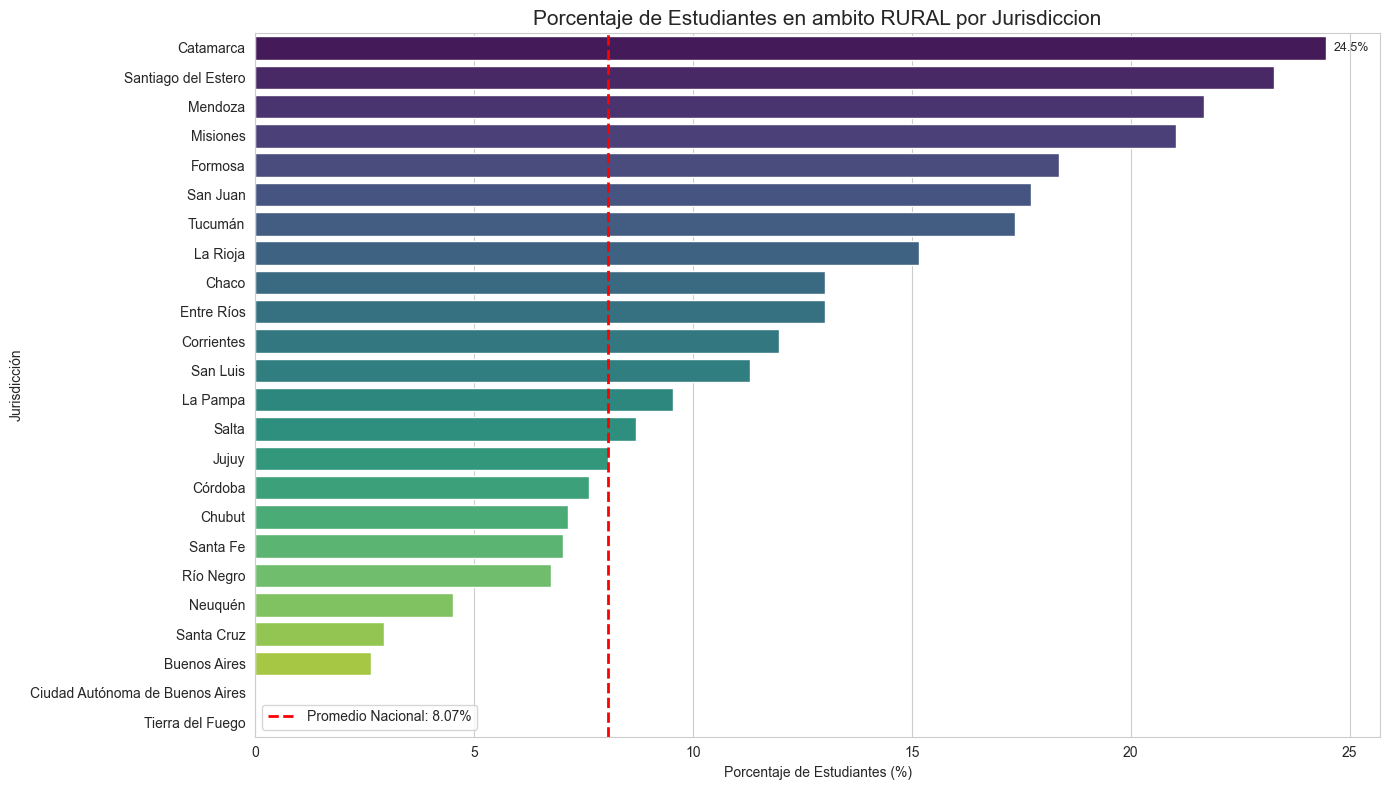

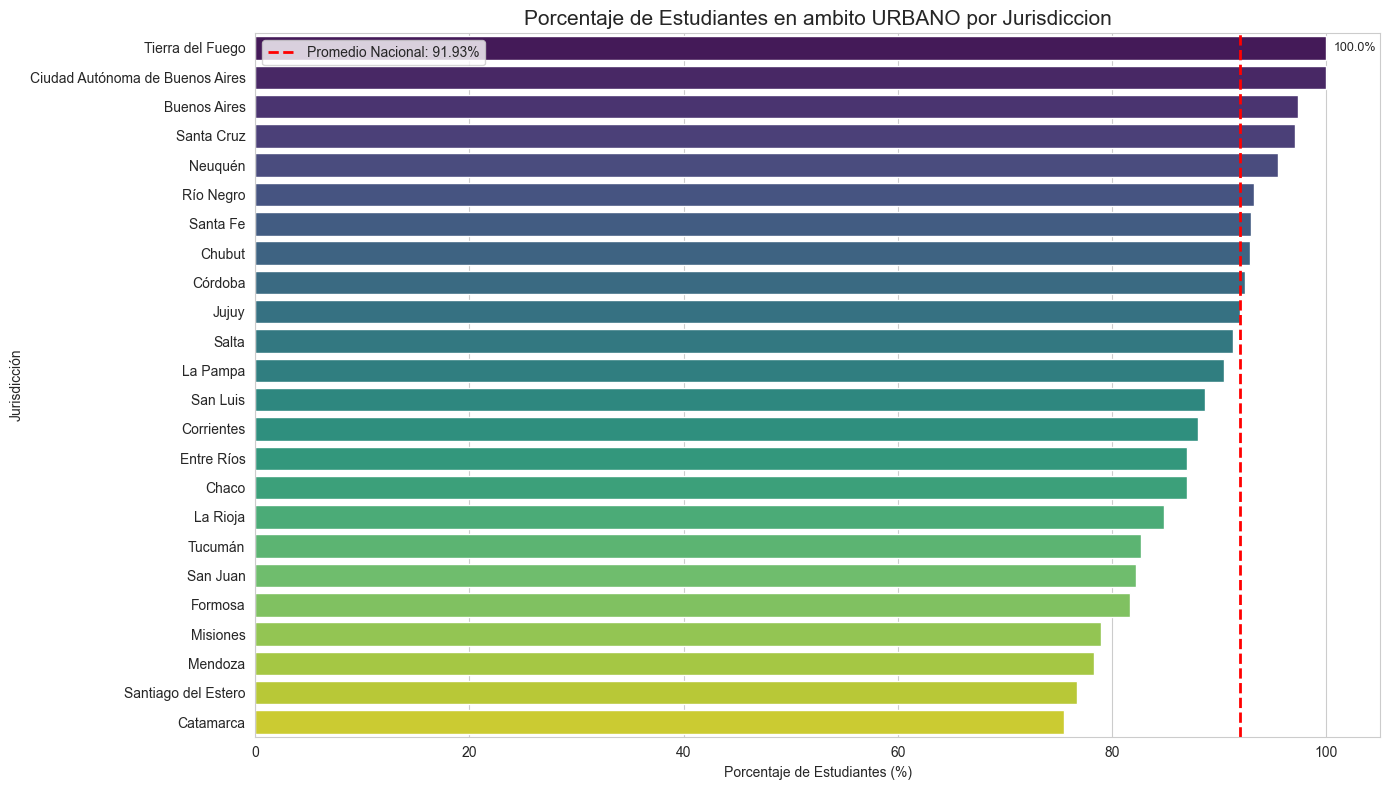

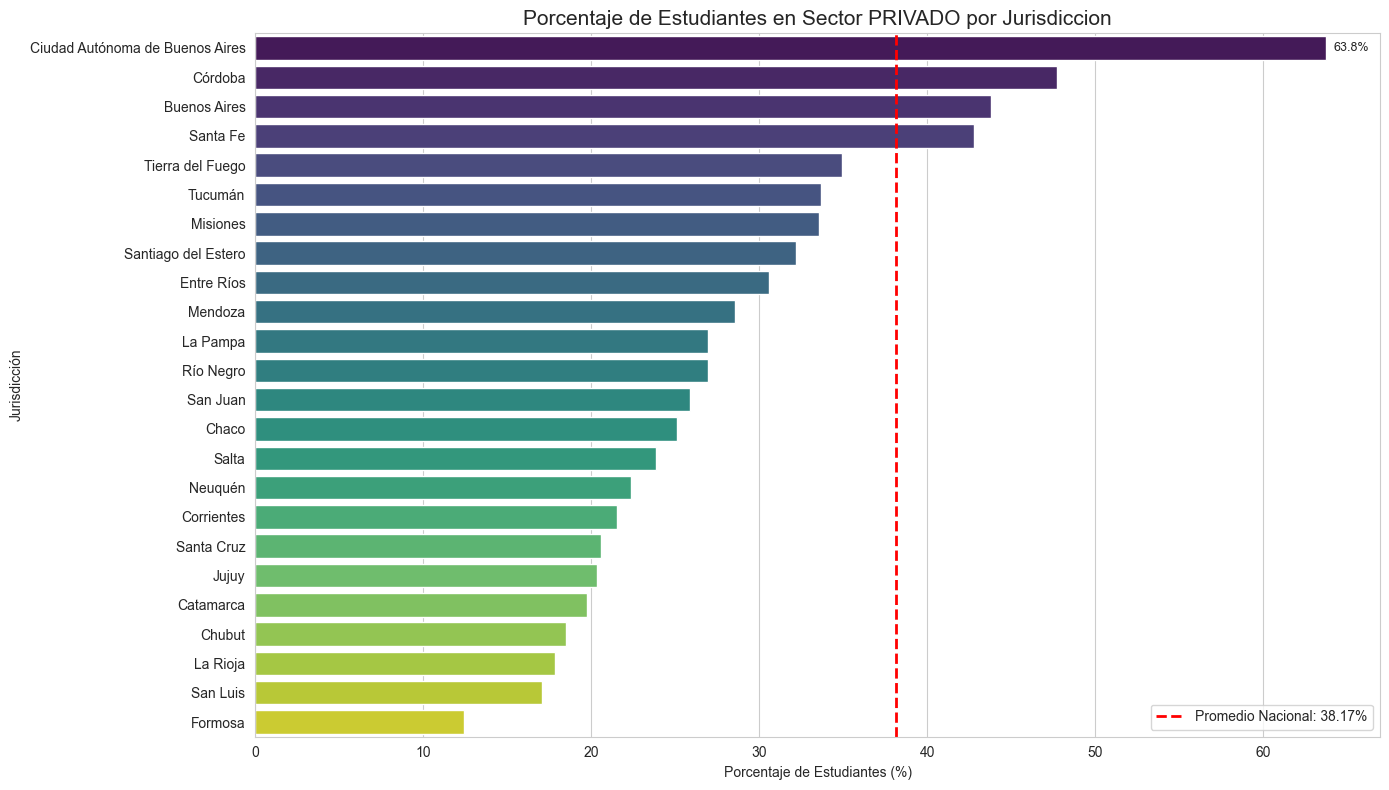

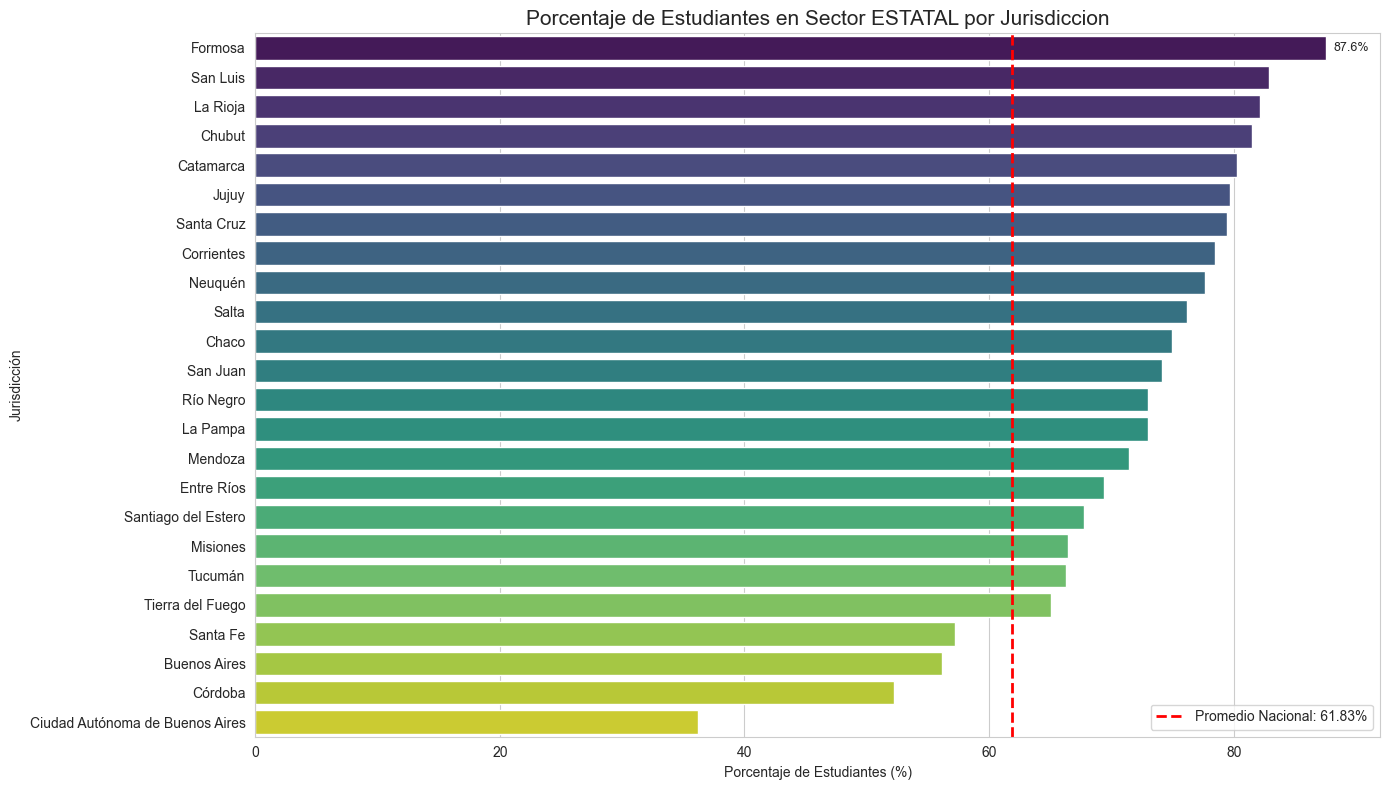

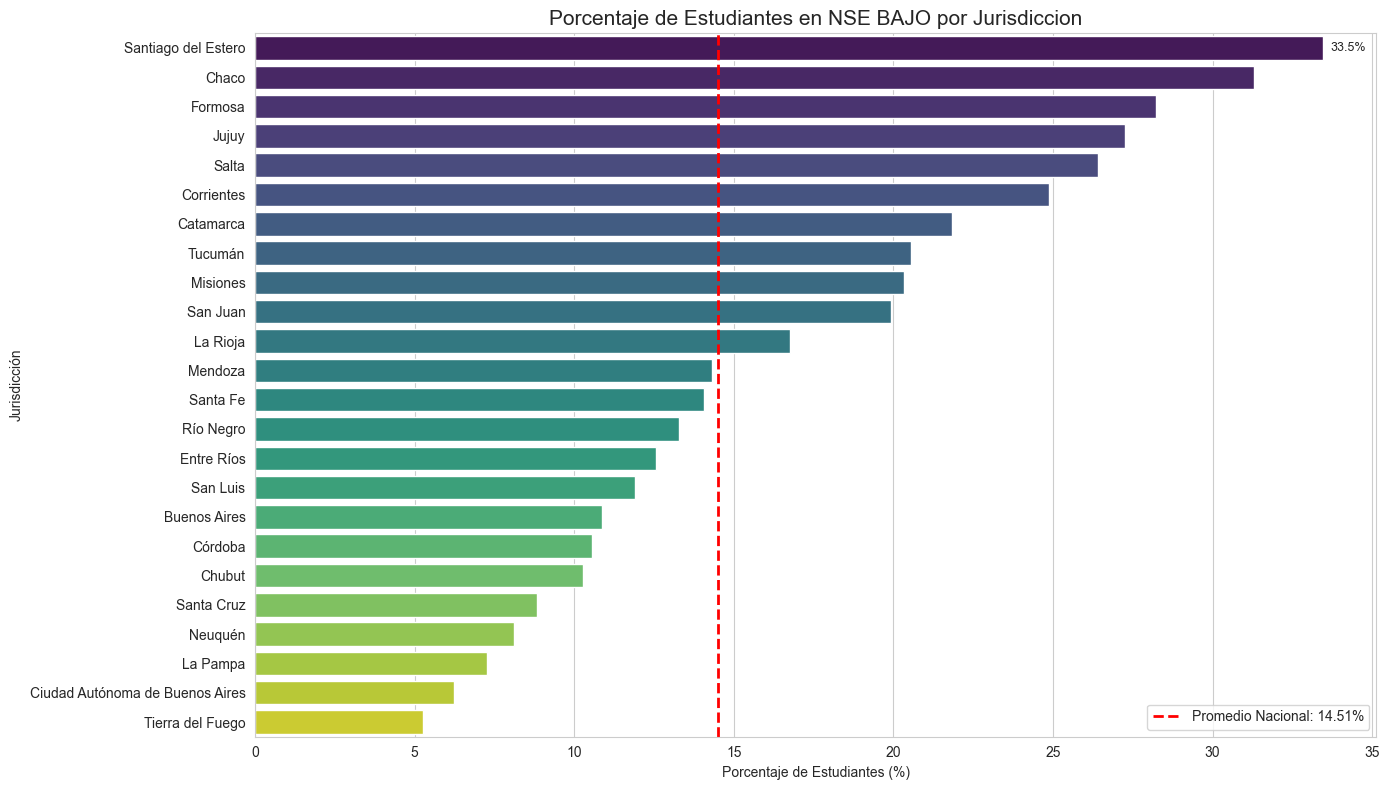

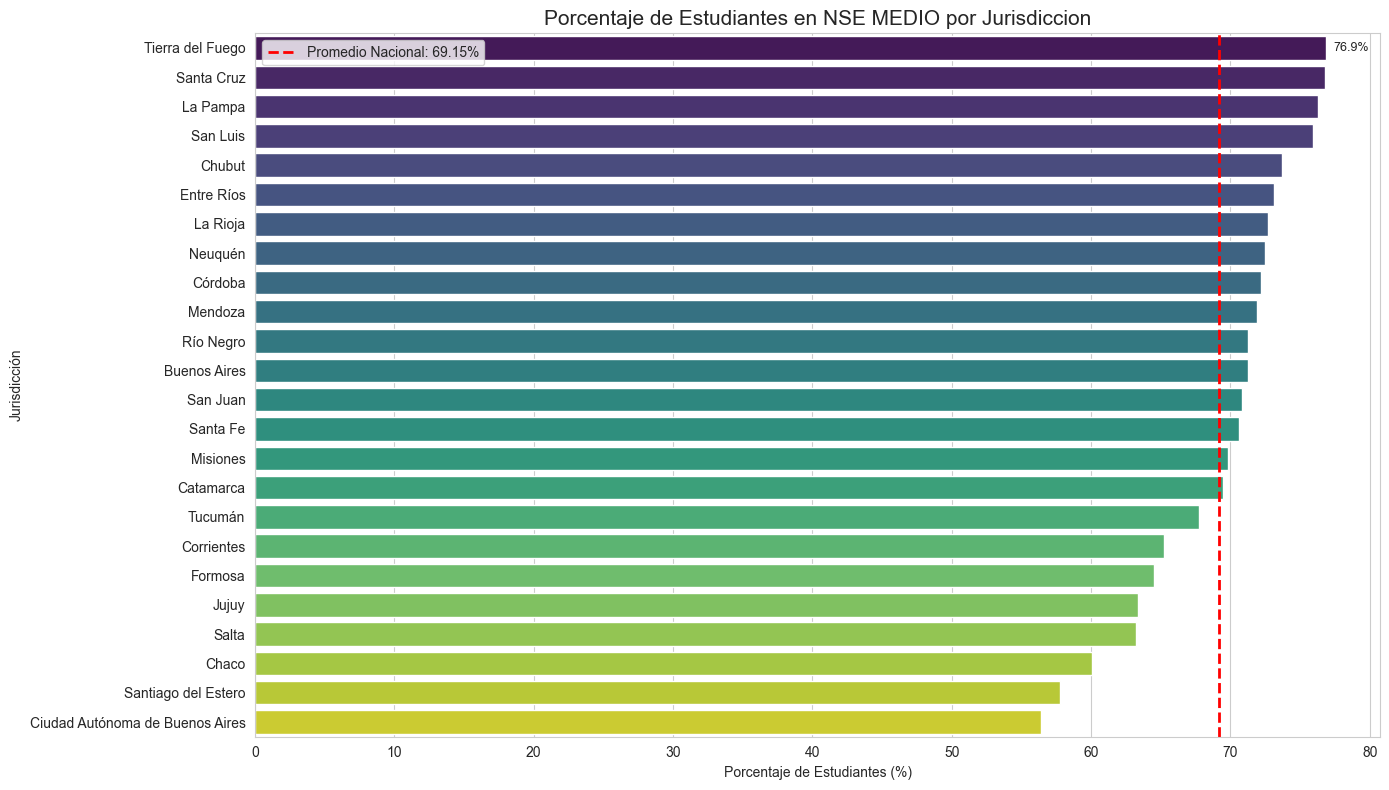

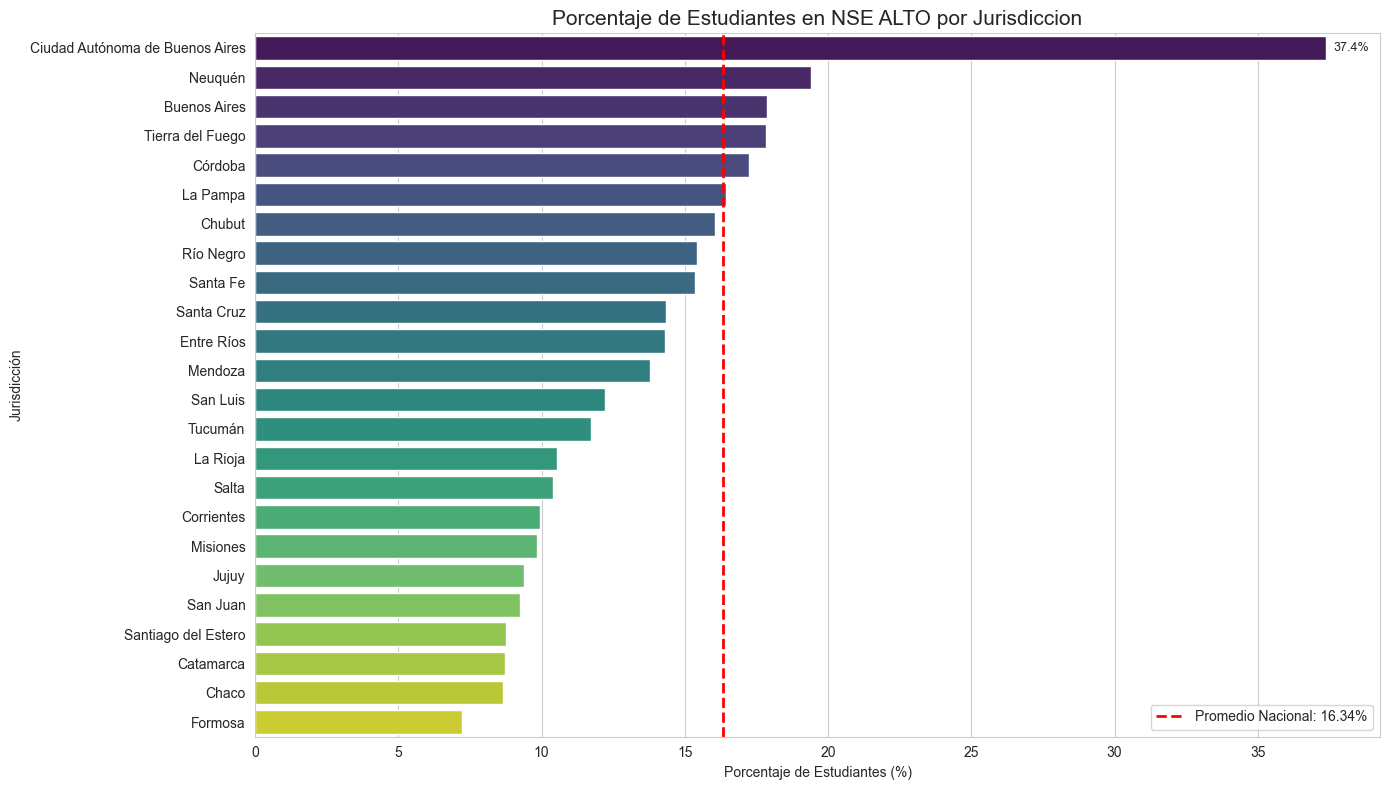

In [28]:
tabla_rural = analizar_pregunta_por_jurisdiccion(
    df, 
    columna_pregunta='ambito', 
    valor_objetivo='Rural', 
    titulo_personalizado='Porcentaje de Estudiantes en ambito RURAL por Jurisdiccion'
)

tabla_urbano = analizar_pregunta_por_jurisdiccion(
    df, 
    columna_pregunta='ambito', 
    valor_objetivo='Urbano', 
    titulo_personalizado='Porcentaje de Estudiantes en ambito URBANO por Jurisdiccion'
)

tabla_privado = analizar_pregunta_por_jurisdiccion(
    df, 
    columna_pregunta='sector', 
    valor_objetivo='Privado', 
    titulo_personalizado='Porcentaje de Estudiantes en Sector PRIVADO por Jurisdiccion'
)

tabla_estatal = analizar_pregunta_por_jurisdiccion(
    df, 
    columna_pregunta='sector', 
    valor_objetivo='Estatal', 
    titulo_personalizado='Porcentaje de Estudiantes en Sector ESTATAL por Jurisdiccion'
)

tabla_estatal = analizar_pregunta_por_jurisdiccion(
    df, 
    columna_pregunta='NSE_nivel', 
    valor_objetivo='Bajo', 
    titulo_personalizado='Porcentaje de Estudiantes en NSE BAJO por Jurisdiccion'
)

tabla_estatal = analizar_pregunta_por_jurisdiccion(
    df, 
    columna_pregunta='NSE_nivel', 
    valor_objetivo='Medio', 
    titulo_personalizado='Porcentaje de Estudiantes en NSE MEDIO por Jurisdiccion'
)

tabla_estatal = analizar_pregunta_por_jurisdiccion(
    df, 
    columna_pregunta='NSE_nivel', 
    valor_objetivo='Alto', 
    titulo_personalizado='Porcentaje de Estudiantes en NSE ALTO por Jurisdiccion'
)

### El EDA se centro en probar las diferencias de rendimiento entre distintos grupos de estudiantes

**Análisis Univariado**: Los promedios de habilidad se establecen en aproximadamente 470 puntos tanto para Lengua como para Matematica, ligeramente por debajo del punto medio de referencia de 500. La mayor dispersion en Matematica sugiere una mayor heterogeneidad en el desempeño de los estudiantes en esta area.

**Nivel Socioeconomico**: La mediana del puntaje del NSE alto es aproximadamente 200 puntos superior a la del NSE bajo. El resultado cuantificado en base a la tabla de contigencia que armamos nos dice que la probabilidad de que un estudiante de NSE Alto alcance el nivel Avanzado es 14 veces mayor que la de un estudiante de NSE Bajo.

### Analisis de Varianza (ANOVA)
El ANOVA se utiliza para validar si las diferencias observadas son reales y no producto del azar.

Los valores PR(>F) para los factores Jurisdicción y Sector son extremadamente bajos.Significado: Se rechaza la hipótesis nula. Las diferencias en los puntajes promedios entre Jurisdicciones y entre el Sector Estatal y Privado son estadísticamente significativas. Esto significa que la ubicación geográfica y la gestión escolar son factores que explican la variación del rendimiento.

Consideramos que el NSE es el principal motor de la brecha. Es el factor mas poderoso para predecir si un estudiante se ubicara en los niveles de desempeño superiores o inferiores. Las diferencias geográficas (jurisdiccion) y de gestion (sector) no son coincidencias; son variaciones significativas en el sistema educativo nacional.
